In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def a(i,j): # calculates the indices of the matrix A
    if(i != 0 and i != Nh and i ==j) : #calculates non end point diagnoal
        return h*j*j/10+7*h/10
    elif(i-1 == j) : # calculates upper diagonal indices
        return 1/20*h*(-i*i+i+3)
    elif(i+1 == j) : # calculates lower diagonal indices
        return 1/20*h*(-j*j+j+3)
    elif( i == 0 and j == 0) : 
        return 7*h/20
    elif( i == Nh and j == Nh):
        return 1/20*h*(Nh*Nh-Nh+7)
    return 0

def l(j) : #calculates value of vector B
    if(j != 0 and j != Nh) :
        return 1/60 *h**3 *(24* h *(2 *j**3 + j) - 7*(6 *j**2 + 1))
    elif j == 0 :
        return 1/ 600 * h**3 *(24 *h -35)
    elif j == Nh :
        return 1/600 * h**3 * (24* h *(10* Nh**3 - 10 *Nh**2 + 5 *Nh - 1) - 35* (6* Nh**2 - 4 *Nh + 1))



def psi(j,x) : #gives psi_j function
    if (j == 0):
        if(0 <= x and x<= h):
            return 1-x/h
    elif(j == Nh) :
        if( (Nh-1)*h <= x and x <= Nh*h) :
            return (x-h*(Nh-1))/h
    else :
        if( (j-1)*h <= x and x <= j*h ):
            return (x-(j-1)*h)/h
        elif (j*h <= x and x <= (j+1)*h) :
            return ((j+1)*h-x)/h
    return 0

def uh(U, x): #given the vector U, produces gives value of the piecewise linear approximation uh
    val = 0
    for i in range(0,len(U)) :
        val += U[i]*psi(i,x)
    return val
    
def sol(x):
    return -x*x*(x-1)*(x-1)

In [3]:
def solver(): #solves the PDE numerically
    x = np.linspace(0,1,1000)
    uArr = np.zeros(len(x))
    uhArr = np.zeros(len(x))
    A = np.resize(np.zeros((Nh+1)**2),((Nh+1),(Nh+1)))
    B = np.zeros(Nh+1)
    
    for i in range(0,Nh+1) :
        for j in range(0,Nh+1) :
             A[i,j] = a(i,j)
    for i in range(0,Nh+1) :
        B[i] = l(i)
    U = np.linalg.solve(A,B)
    for i in range(len(x)):
        uArr[i] = sol(x[i])
        uhArr[i] = uh(U,x[i])
    return uhArr

def EOC(h, ht, Eh, Eht): #calculates EOC
    return (np.log(Eh)-np.log(Eht))/(np.log(h)-np.log(ht))
    
def CalcErrMax(DisSols, solution,Nvals) : #calculates values of EOC for given Nh 
    errMax = np.zeros(len(DisSols))
    for i in range(len(errMax) ):
        errMax[i] = np.max(np.abs(DisSols[i]-solution))
    ErrMaxEOC = np.zeros(len(errMax)-1)
    for i in range(len(errMax)-1) :
        ErrMaxEOC[i] = EOC(1/Nvals[i],1/Nvals[i+1], errMax[i], errMax[i+1])
    return ErrMaxEOC

    

In [4]:
Ns = np.array([20,40,60,80,100])
sols = np.ndarray(shape = (len(Ns),1000))
for j in range(len(Ns)) : #calculate the approximation uh for various values of Nh
    Nh = Ns[j]
    h = 1/Nh
    sols[j] = solver()

FIrst we plot the  true solution to the PDE given in the assignment, which is $-x^2(x-1)^2$

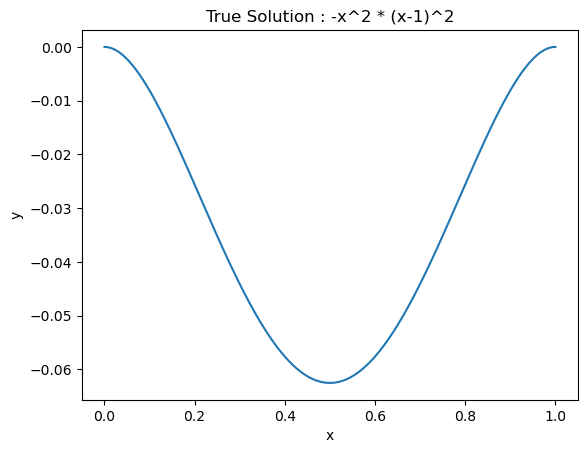

In [5]:
trueSol = sol(np.linspace(0,1,1000))
plt.plot(np.linspace(0,1,1000), trueSol)
plt.title('True Solution : -x^2 * (x-1)^2')
plt.xlabel("x")
plt.ylabel("y")
plt.show()

We now plot our finite element scheme for various values of $N_h$

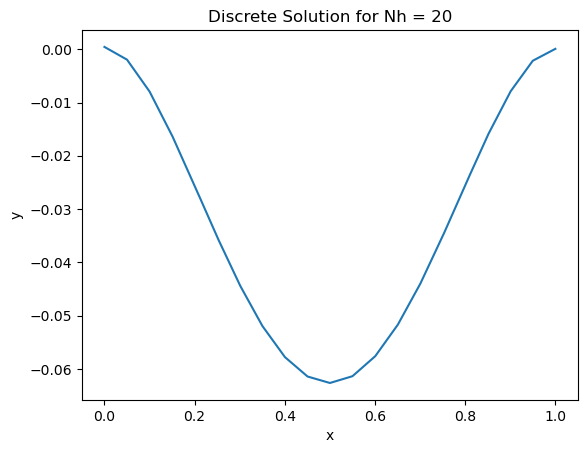

In [6]:
plt.plot(np.linspace(0,1,1000), sols[0])
plt.title('Discrete Solution for Nh = %i' % Ns[0])
plt.xlabel("x")
plt.ylabel("y")
plt.show()

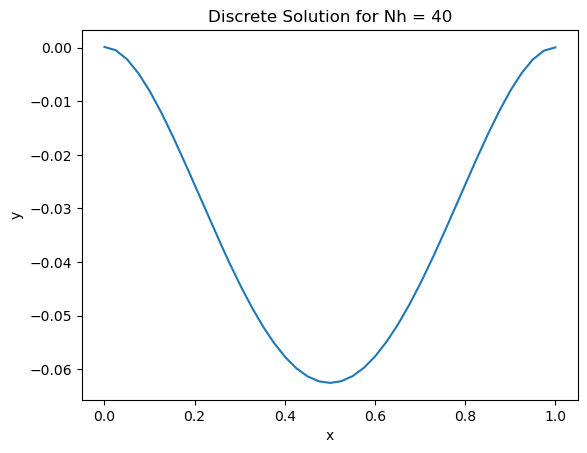

In [7]:
plt.plot(np.linspace(0,1,1000), sols[1])
plt.title('Discrete Solution for Nh = %i' % Ns[1])
plt.xlabel("x")
plt.ylabel("y")
plt.show()

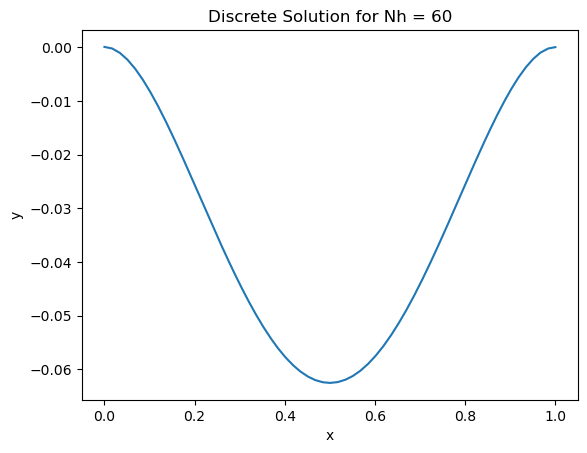

In [8]:
plt.plot(np.linspace(0,1,1000), sols[2])
plt.title('Discrete Solution for Nh = %i' % Ns[2])
plt.xlabel("x")
plt.ylabel("y")
plt.show()

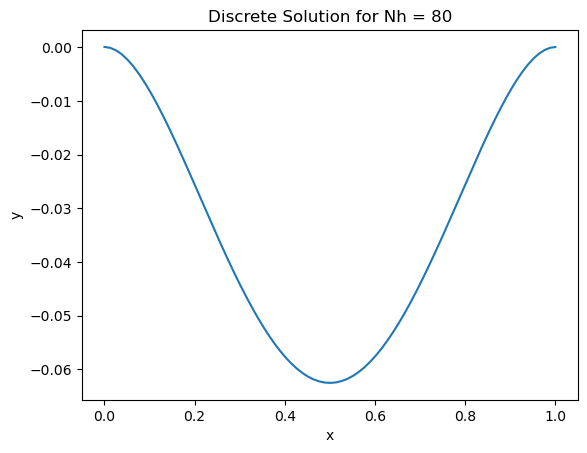

In [9]:
plt.plot(np.linspace(0,1,1000), sols[3])
plt.title('Discrete Solution for Nh = %i' % Ns[3])
plt.xlabel("x")
plt.ylabel("y")
plt.show()

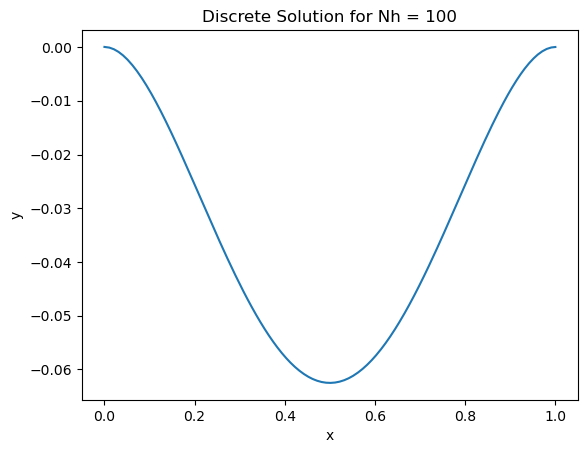

In [10]:
plt.plot(np.linspace(0,1,1000), sols[4])
plt.title('Discrete Solution for Nh = %i' % Ns[4])
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Finally we calculate the EOC for the supremum norm $\| \cdot \|_{\infty}$ :

In [11]:
print(CalcErrMax(sols,trueSol, Ns))

[1.84975648 1.91535551 1.9405821  1.94973861]


We note that all of these values are $\approx 2$. Thus showing quadratic convergence in $\| \cdot \|_{\infty}$. 